# 1.1 plot

![my_image](IMG_4863.JPG)

# 1.2 mathematical equation

$$a_{1i}=w_{1i1}x_1+w_{1i2}x_2+b_{1i};i=1,2,3$$

$$h_{1i}=max(0,a_{1i});i=1,2,3$$

$$a_{2j}=w_{21j}h_{11}+w_{22j}h_{12}+w_{23j}h_{13}+b_{2j};j=1,2$$

$$h_{2j}=max(0,a_{2j});j=1,2$$

$$a_{3n}=w_{31n}h_{21}+w_{32n}h_{22}+b_{3n};n=1,2,3$$

$$y_{n}=softmax(a_{3n});n=1,2,3$$

$${\bf \hat y}=softmax(max(max({\bf x}{\bf w_1}+{\bf b_1},0){\bf w_2}+{\bf b_2},0){\bf w_3}+{\bf b_3})$$
where $$softmax(x_i)=\frac{e^x_i}{\sum_{i=1}^ne^x_i} $$



# 1.3 function in python

In [157]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division



softmax = lambda x: np.exp(x)/(np.exp(x).sum(axis=1, keepdims=True))
lmax= lambda x: np.array([[max(0,j) for j in i] for i in x ])



def ff_nn_2_ReLu(x,W1,W2,W3,b1,b2,b3):
    a_1=np.dot(W1,x)+b1
    h1=lmax(a_1)
    a_2=np.dot(W2,h1)+b2
    h2=lmax(a_2)
    a_3=np.dot(W3,h2)+b3
    y=softmax(a_3)
    return y

# 1.4 class probabilities

In [158]:
W1 = np.array([[1,0],[-1,0],[0,0.5]])
W2 = np.array([[1,0,0],[-1,-1,0]])
V = np.array([[1,1],[0,0],[-1,-1]])
b1 = np.array([[0,0,1]]).T
b2 = np.array([[1,-1]]).T
c = np.array([[1,0,0]]).T
x = np.array([[1,0,0],[-1,-1,1]])

y=ff_nn_2_ReLu(x,w1,W2,V,b1,b2,c)
print(y)

[[0.57611688 0.21194156 0.21194156]
 [0.33333333 0.33333333 0.33333333]
 [0.1553624  0.4223188  0.4223188 ]]


# 2 Gradien Descent

$$f(x,y)=(1-x)^2+100*(y-x^2)^2$$

# 2.1partial derivatives

$$\frac{\partial f(x,y)}{\partial x}=2(200x^3-200xy+x-1)$$

$$\frac{\partial f(x,y)}{\partial y}=200(y-x^2)$$

# 2.2  contours of the Rosenbrock function

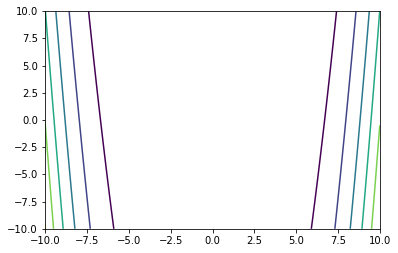

In [159]:
delta=0.025
x=np.arange(-10.0, 10.0, delta)
y=np.arange(-10.0, 10.0, delta)
X,Y=np.meshgrid(x,y)
Z=(1-X)**2 + 100*(Y-X**2)**2
fig,ax=plt.subplots()
CS=ax.contour(X,Y,Z)


# 2.3 Gradient  finding minimum

[[ 5.42641287 -9.58496101]
 [-3.04638735 -8.80434266]
 [-0.84184357 -8.44264629]
 ...
 [ 1.          1.        ]
 [ 1.          1.        ]
 [ 1.          1.        ]]


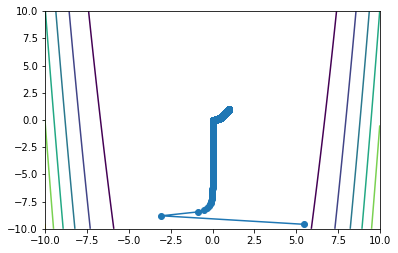

In [160]:
# --- Defining gradient ----
def grad_f(vector):
    x, y = vector
    df_dx = 2*(200*x**3-200*x*y+x-1) 
    df_dy = 200*(y-x**2)
    return np.array([df_dx, df_dy])

# --- Grad Descent ----
def grad_descent(starting_point=None, iterations=10, learning_rate=12):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-10,10,size=2)
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        #print(grad)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

np.random.seed(10)
traj = grad_descent(iterations=500000,learning_rate=0.0001)
print(traj)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

[[2.6729647  4.97607765]
 [0.35091531 5.40981018]
 [1.09428266 4.35247645]
 ...
 [1.         1.        ]
 [1.         1.        ]
 [1.         1.        ]]


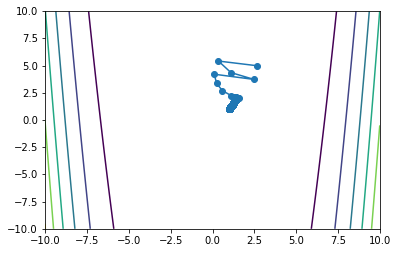

In [161]:
traj = grad_descent(iterations=50000,learning_rate=0.001)
print(traj)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

# 2.4 Gradient with momentum

[[ 5.42641287 -9.58496101]
 [-3.04638735 -8.80434266]
 [-5.07824368 -8.05233711]
 ...
 [ 1.          1.        ]
 [ 1.          1.        ]
 [ 1.          1.        ]]


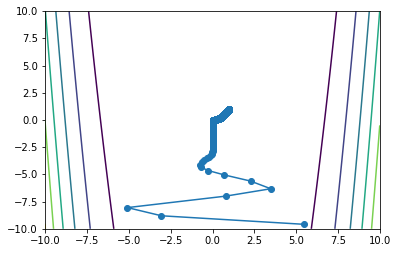

In [162]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-10,10,size=2)
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

np.random.seed(10)
traj = grad_descent_with_momentum(iterations=300000, epsilon=0.0001, alpha=.5)
print(traj)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

[[2.6729647  4.97607765]
 [2.44075976 5.0194509 ]
 [2.32568774 5.04254537]
 ...
 [1.00002828 1.00005667]
 [1.00002828 1.00005667]
 [1.00002827 1.00005666]]


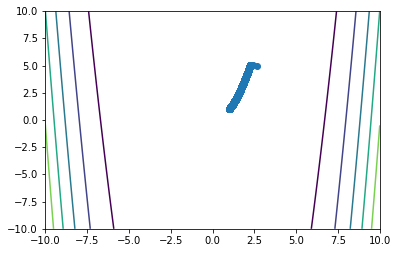

In [163]:
traj = grad_descent_with_momentum(iterations=300000, epsilon=0.0001, alpha=.1)
print(traj)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

# 3 Backprop

## 3.1

Here we use $W^1,W^2,W^3,b^1,b^2,b^3$ to represent the weight matrics and bias vectors.

We also got the euquations of backpropagation:

$$\delta ^L=\bigtriangledown_aL \odot \sigma'(z^L)$$

$$\delta ^l=((w^{l+1})^T\delta^{l+1})\odot \sigma'(z^l)$$

$$\frac{\partial L}{\partial b^l_j}=\delta^l_j$$

$$\frac{\partial L}{\partial w^l_{jk}}=a^{l-1}_k\delta^l_j$$

For bias weights: $\frac{\partial L}{\partial b^l_j}=\delta^l_j$

$$\frac{\partial L}{\partial b^3}=\delta^3=\frac{\partial L}{\partial \hat y}=\hat y-y$$

$$\frac{\partial L}{\partial w^3}=a^2\delta ^3=a^2(\hat y-y)$$

$$\frac{\partial L}{\partial b^2}=\delta ^2=((w^{3})^T\delta^{3})\odot \sigma'(z^2)=((w^{3})^T(\hat y-y))\odot ReLu'(z^2)$$

$$\frac{\partial L}{\partial w^2}=a^1\delta^2=a^1((w^{3})^T(\hat y-y))\odot ReLu'(z^2)$$

$$\frac{\partial L}{\partial b^1}=\delta^1=((w^{2})^T\delta^{2})\odot ReLu'(z^1)$$

$$\frac{\partial L}{\partial w^1}=x\delta^1=x((w^{2})^T\delta^{2})\odot ReLu'(z^1)$$

if this section can't be fully displayed, please see the attached pic below.

![my_image](p3_3.png)

## 3.2

In [164]:
def loss (y,y_hat):
    tot = y * np.log(y_hat)
    return  -tot.sum()
def relu_derivative(x):
    return np.where(x>0, 1, 0)

def forward(x,parameters):
    
    w_1,w_2,w_3,b_1,b_2,b_3 = parameters
    
    z_1 = x.dot(w_1.T) + b_1.T
    a_1 = lmax(z_1)
    z_2 = a_1.dot(w_2.T) + b_2.T
    a_2 = lmax(z_2)
    z_3 = a_2.dot(w_3.T) + b_3.T
    y_hat = softmax(z_3)
    
    return y_hat,z_1,a_1,z_2,a_2,z_3

def grad_f(x,y,parameters):
    
    w_1,w_2,w_3,b_1,b_2,b_3 = parameters
    
    y_hat,z_1,a_1,z_2,a_2,z_3 = forward(x,parameters)
    
    dw3 = np.zeros((3,2))
    db3 = np.zeros((3,1))
    dw2 = np.zeros((2,3))
    db2 = np.zeros((2,1))
    dw1 = np.zeros((3,2))
    db1 = np.zeros((3,1))
    
    for i in range(x.shape[0]):
        dL = y_hat[i].reshape(3,1) - y[i].reshape(3,1)
    
        db3+= dL

        dw3+= dL.dot(a_2[i].reshape(1,2))
        
        delta2 = w_3.T.dot(dL)*relu_derivative(z_2[i].reshape(2,1))
        
        db2+= delta2
        
        dw2+= delta2.dot(a_1[i].reshape(1,3))
        
        delta1 = w_2.T.dot(delta2)*relu_derivative(z_1[i].reshape(3,1))
        
        db1+= delta1
        
        dw1+= delta1.dot(x[i].reshape(1,2))
        
    
    return dw1, dw2, dw3,db1,db2,db3
    
    


## 3.3

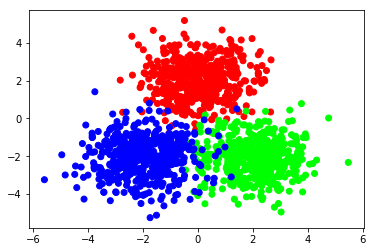

In [182]:
x_1 = np.random.multivariate_normal(mean = [0,2],cov = [[1,0],[0,1]],size = 500)
x_2 = np.random.multivariate_normal(mean = [2,-2],cov = [[1,0],[0,1]],size = 500)
x_3 = np.random.multivariate_normal(mean = [-2,-2],cov = [[1,0],[0,1]],size = 500)
x = np.concatenate((x_1,x_2,x_3))
y_1 = np.array([[1,0,0] for i in range(500)])
y_2 = np.array([[0,1,0] for i in range(500)])
y_3 = np.array([[0,0,1] for i in range(500)])
y = np.concatenate((y_1,y_2,y_3))
plt.scatter(x[:,0], x[:,1],c=y)


## 3.4

In [183]:
def grad_descent(x, y, parameters, iterations=10, learning_rate=0.2):
    point = parameters
    trajectory = [point]
    W1,W2,W3,b1,b2,b3=parameters
    losses = [loss(y, forward(x,parameters)[0])]
    #ff_nn_2_ReLu(x,W1,W2,W3,b1,b2,b3)
    for i in range(iterations):
        y_hat = forward(x,point)[0]
        grad = grad_f(x, y,point)
        point= np.subtract(point,[j*learning_rate for j in grad])
        trajectory.append(point)
        losses.append(loss(y, forward(x,point)[0]))
    return (np.array(trajectory), losses)

W1 = np.random.randn(6).reshape((3,2))
b1 = np.random.randn(3).reshape((3,1))
W2 = np.random.randn(6).reshape((2,3))
b2 = np.random.randn(2).reshape(2,1)
W3 = np.random.randn(6).reshape((3,2))
b3 = np.random.randn(3).reshape((3,1))

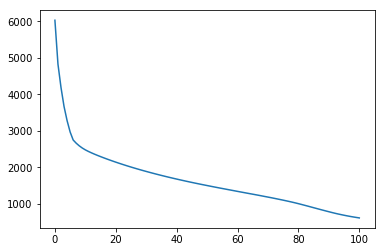

In [184]:
parameters = [W1,W2,W3,b1,b2,b3]
traj, losses = grad_descent(x ,y,parameters, iterations=100,learning_rate=0.00005)
plt.plot(losses)

## 3.5

In [185]:
def grad_descent_with_momentum(x,y,parameters, iterations=10, alpha=.9, epsilon=10):
    point = parameters
    trajectory = [point]
    losses = [loss(y, forward(x,point)[0])]
    v = [np.zeros(np.shape(i)) for i in parameters]
    
    for i in range(iterations):
        y_hat = forward(x,point)[0]
        grad = grad_f(x, y,point)
        v = np.add([alpha*i for i in v],[j*epsilon for j in grad])
        point = point - v
        trajectory.append(point)
        losses.append(loss(y, forward(x,point)[0]))
    return (np.array(trajectory),losses)

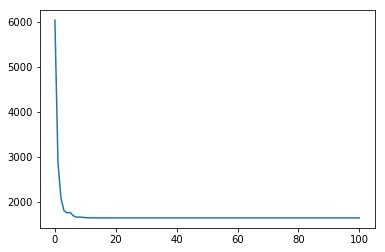

In [186]:
parameters = [W1,W2,W3,b1,b2,b3]
traj, losses = grad_descent_with_momentum(x ,y,parameters, iterations=100,alpha=.6, epsilon=0.001)
plt.plot(losses)